In [2]:
%load_ext autoreload
%autoreload 2

# Part 1

In [18]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [19]:
sourceStabilityPath = "data/sourceStability.txt" # Take from after 30s
polarizer0Path = "data/polarizer0.csv" # Source/fixed/variable
polarizer1Path = "data/polarizer1.csv" # Source/variable/fixed

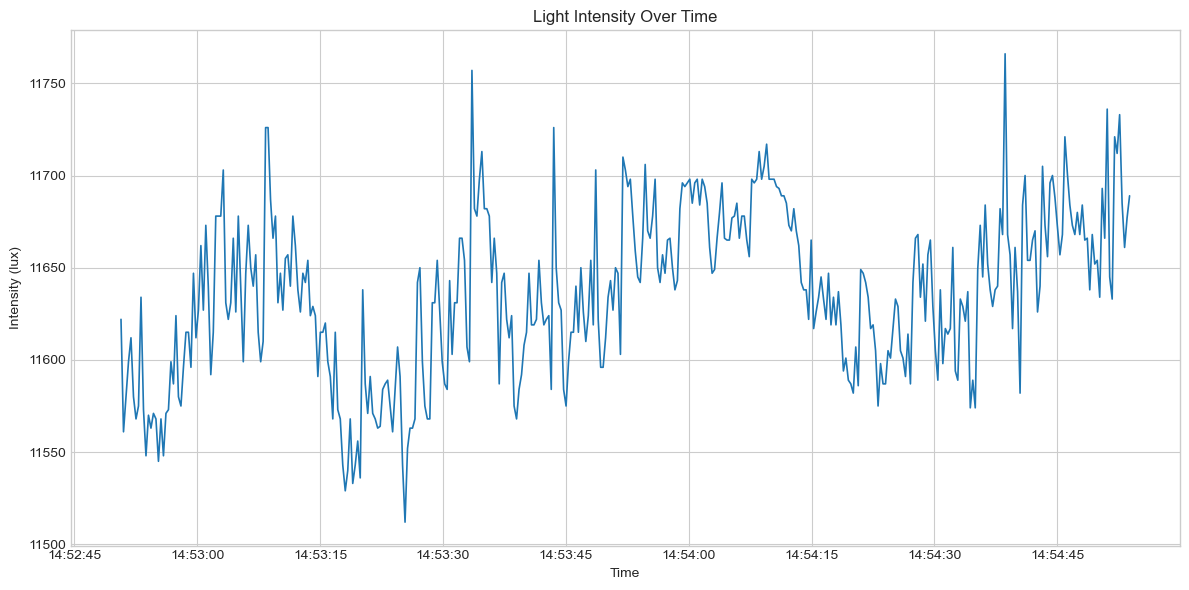

In [20]:
# Read and parse the data
sourceStability = pd.read_csv(sourceStabilityPath, sep='|', header=None, names=['timestamp', 'lux'])

# Convert timestamps to datetime
sourceStability['timestamp'] = pd.to_datetime(sourceStability['timestamp'])
cutoff = 98

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(sourceStability['timestamp'][cutoff:], sourceStability['lux'][cutoff:], linewidth=1.2)
plt.title("Light Intensity Over Time")
plt.xlabel("Time")
plt.ylabel("Intensity (lux)")
plt.grid(True)
plt.tight_layout()
plt.show()


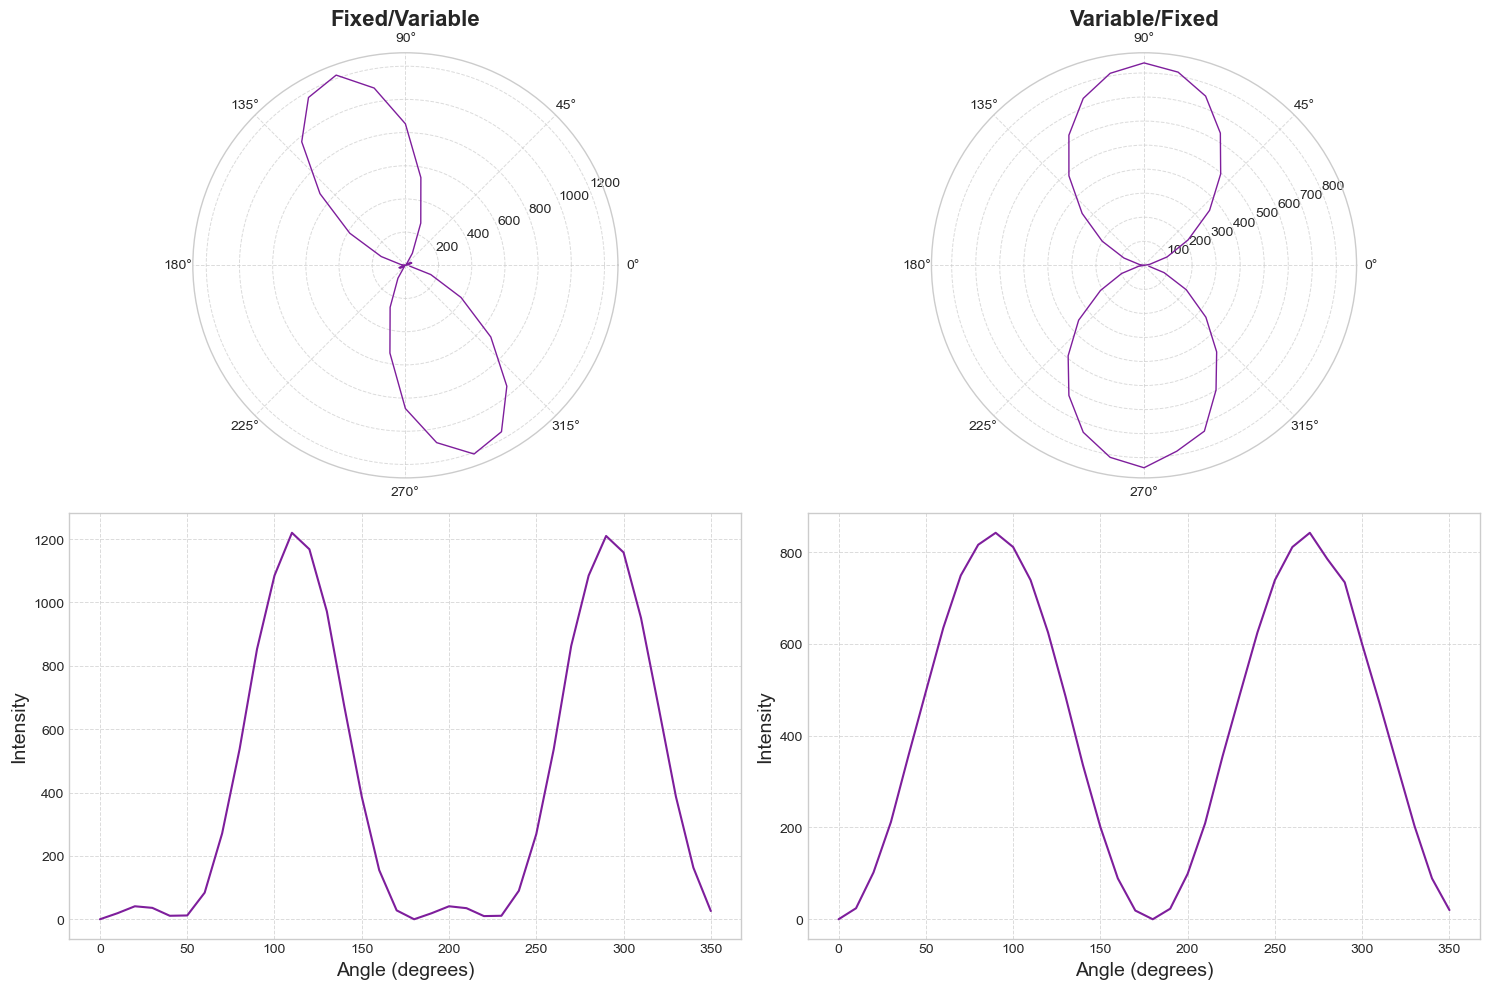

In [17]:
polarizer0 = pd.read_csv(polarizer0Path, header=0)
polarizer1 = pd.read_csv(polarizer1Path, header=0)

fig = plt.figure(figsize=(15, 10))

# Upper left: Polar
ax1 = fig.add_subplot(2, 2, 1, projection='polar')
ax1.plot(np.radians(polarizer0['angle']), polarizer0['intensity'], color='xkcd:purple', linewidth=1)
ax1.set_title('Fixed/Variable', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Upper right: Polar
ax2 = fig.add_subplot(2, 2, 2, projection='polar')
ax2.plot(np.radians(polarizer1['angle']), polarizer1['intensity'], color='xkcd:purple', linewidth=1)
ax2.set_title('Variable/Fixed', fontsize=16, fontweight='bold', pad=20)
ax2.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Lower left: Cartesian
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(polarizer0['angle'], polarizer0['intensity'], color='xkcd:purple')
ax3.set_ylabel('Intensity', fontsize=14)
ax3.set_xlabel('Angle (degrees)', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=10)
ax3.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Lower right: Cartesian
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(polarizer1['angle'], polarizer1['intensity'], color='xkcd:purple')
ax4.set_ylabel('Intensity', fontsize=14)
ax4.set_xlabel('Angle (degrees)', fontsize=14)
ax4.tick_params(axis='both', which='major', labelsize=10)
ax4.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


# Part 2

In [9]:
import sys, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

root = Path.cwd().parent 
sys.path.append(str(root))

import src.malus as malus

In [15]:
seq1 = sorted(Path('data/papel').glob("*.jpg"))

points = [[618,618], [618+290,618], [618-290,618], [618,618+290], [618,618-290]]
angles = list(range(90, 360+90, 10))         # same angle vector
space = np.linspace(90, 360+90, 500)        # same resolution vector

# Compute average BGR values for all points
results = malus.avg_pixel_values_multiple_points(seq1, points, 5)

# Convert each BGR triplet list to an average intensity (mean of channels)
intensity = []
for pt in points:
    point_data = results[tuple(pt)]
    averaged_intensity = [float(np.mean(p)) for p in point_data]
    intensity.append(averaged_intensity)

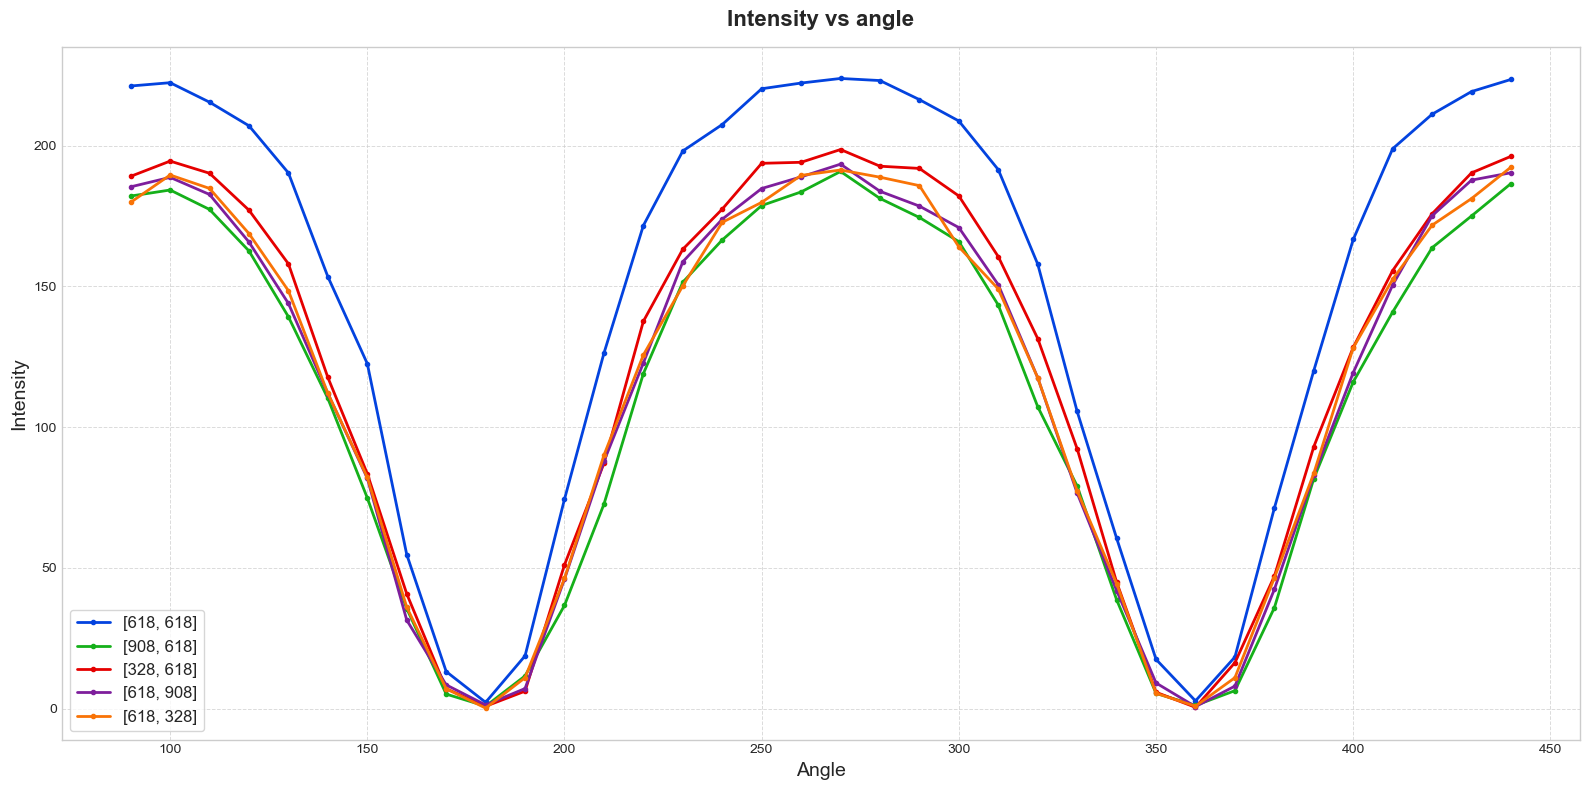

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')  # Modern style
fig, ax = plt.subplots(figsize=(16, 8))

for channel, color, coor in zip(intensity, ['blue', 'green', 'red', 'purple', 'orange'], [str(i) for i in points]):
    ax.plot(angles, channel, marker='.', linewidth=2, color=f'xkcd:{color}', label=f'{coor}', zorder=1)

ax.set_ylabel('Intensity', fontsize=14)
ax.set_xlabel('Angle', fontsize=14)
ax.set_title('Intensity vs angle', fontsize=16, fontweight='bold', pad=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax.legend(fontsize=12, loc='best', frameon=True)
plt.tight_layout()
# plt.savefig('Srel.png', dpi=300)
plt.show()